In [1]:
#Import Libraries

from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
from datetime import datetime
import re

### SCRAPE BOOMPLAY FOR SONGS AND ARTISTS

In [2]:
# URL
url='https://www.boomplay.com/playlists/26356675?from=home'

In [3]:
response = requests.get(url)
response
soup= BeautifulSoup(response.content, 'lxml')

In [4]:
#Dictionaries
song_name = {'song_name':[]}
artist = {'artist_name':[]}
time= []


In [5]:
#Getting the Song title and artist name 
#Song name
artist_list = []

song_data = soup.findAll('div', {'class':'songNameWrap'})
artist_data= soup.findAll('a', {'class':'artistName'})


index=1
while index < 31:
    name = song_data[index].text.replace('\n','').split('ft.')
    if len(name)>=2: 
        name=name[0]
        #print(name)
    else:
        name = name[0]
        #print(name)
    
    
    
    
    song_name['song_name'].append(name)
    index = index+1
#song title    
i = 0 
while i<30:
    artist_name = artist_data[i].text
    artist['artist_name'].append(artist_name)
    artist_list.append(artist_name)
    i = i+1


#### Programitic web search for artist's age

In [6]:
#loop for building the url
age_url =[]

for i in artist_list:
    first_C ="'"
    second_C ="'"
    url2= "https://en.wikipedia.org/wiki/"+ i
    
    age_url.append(url2)
    
    
    

In [7]:
age_url

['https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Ayra Starr',
 'https://en.wikipedia.org/wiki/Fireboy DML',
 'https://en.wikipedia.org/wiki/Bella Shmurda',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/CKay',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Adekunle Gold',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Victony',
 'https://en.wikipedia.org/wiki/CKay',
 'https://en.wikipedia.org/wiki/Burna Boy',
 'https://en.wikipedia.org/wiki/Pheelz',
 'https://en.wikipedia.org/wiki/Mr Eazi',
 'https://en.wikipedia.org/wiki/Major Lazer',
 'https://en.wikipedia.org/wiki/Young Jonn',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Omah Lay',
 'https://en.wikipedia.org/wiki/Ruger',
 'https://en.wikipedia.org/wiki/WizKid',
 'https://en.wikipedia.org/wiki/Lojay',
 'https://en.wikipedia.org/wiki/Black Sherif',
 'https://en.wikipedia.org/wiki/Oxlade',
 'https://en.wikipedia.

In [8]:
#getting and storing the artist age
error = []
artist_age = {'a_age':[]}
n=0
pattern = "[0-9]{4}|[0-9]{2}|[0-9]{2}"
for j in age_url:
    
    response1 = requests.get(j)

    try:
        soup1 = BeautifulSoup(response1.content,'html.parser')
        age_data = soup1.select_one('span span',{'class':'bday'})
        age = age_data.text
       #checking if the the age data mathes the pattern 
        if (re.search(pattern, age)):
            artist_age['a_age'].append(age)
        else:
            artist_age['a_age'].append('NA')

    except AttributeError:
        artist_age['a_age'].append('NA')
        error.append('NA')              
        print('NA')

NA
NA
NA


In [9]:
pd.DataFrame(artist_age)

a_age
0     1995-01-13
1     2002-06-14
2     1996-02-05
3     1997-01-27
4     1995-01-13
5     1995-07-16
6     1995-01-13
7     1987-01-28
8     1995-01-13
9             NA
10    1995-07-16
11    1991-07-02
12    1994-06-05
13    1991-07-19
14            NA
15  January 2020
16    1995-01-13
17            NA
18          1949
19    1990-07-16
20    1996-04-28
21    2002-01-09
22            NA
23    1995-01-13
24            NA
25    1991-07-02
26            NA
27    1995-01-13
28          1949
29            NA

In [10]:

response1 = requests.get('https://en.wikipedia.org/wiki/Burna_Boy')
soup1 = BeautifulSoup(response1.content,'html.parser')
age_data = soup1.select_one('span span',{'class':'bday'})


In [11]:
age_data.text

'1991-07-02'

In [12]:
artist_age

{'a_age': ['1995-01-13',
  '2002-06-14',
  '1996-02-05',
  '1997-01-27',
  '1995-01-13',
  '1995-07-16',
  '1995-01-13',
  '1987-01-28',
  '1995-01-13',
  'NA',
  '1995-07-16',
  '1991-07-02',
  '1994-06-05',
  '1991-07-19',
  'NA',
  'January 2020',
  '1995-01-13',
  'NA',
  '1949',
  '1990-07-16',
  '1996-04-28',
  '2002-01-09',
  'NA',
  '1995-01-13',
  'NA',
  '1991-07-02',
  'NA',
  '1995-01-13',
  '1949',
  'NA']}

In [13]:
#Getting run_time
time = {'time':[]}

for t in range(30):
    time_data = soup.findAll('li',{'class':'clearfix play_one'})
    time['time'].append(time_data[t].time.text)




#### Creating DataFrames

In [14]:
song_name = pd.DataFrame(song_name)

In [15]:
artist_name = pd.DataFrame(artist)

In [16]:
artist_age = pd.DataFrame(artist_age)

In [17]:
run_time = pd.DataFrame(time)

In [18]:
artist_name.index.set_names('No',inplace = True)
artist_age.index.set_names('No',inplace = True)
song_name.index.set_names('No',inplace = True)
run_time.index.set_names('No', inplace = True)

In [19]:
df1 = song_name.merge(artist_name, on='No')
df2= df1.merge(artist_age, on='No')
df=df2.merge(run_time, on='No')

In [20]:
df

song_name    artist_name  \
No                                                                  
0                                         Organise          Asake   
1                                             Rush     Ayra Starr   
2                                         Bandana     Fireboy DML   
3                                           Philo   Bella Shmurda   
4                                       Terminator          Asake   
5         samson and delilah (feat. Mayra Andrade)           CKay   
6                                             Joha          Asake   
7                          5 Star (with Rick Ross)  Adekunle Gold   
8                                             Dull          Asake   
9                                          Soweto         Victony   
10                        lose you (feat. Ronisia)           CKay   
11                                   Common Person      Burna Boy   
12                                    Electricity          Pheelz   
13                                          Patek         Mr Eazi   
14  Koo Koo Fun (feat. Tiwa Savage & DJ Maphorisa)    Major Lazer   
15                                       Xtra Cool     Young Jonn   
16                                           Nzaza          Asake   
17                   Take It On (Sprite Limelight)       Omah Lay   
18                                            WeWe          Ruger   
19                                       Bad To Me         WizKid   
20                                         LEADER!          Lojay   
21                                            Soja   Black Sherif   
22                        KU LO SA - A COLORS SHOW         Oxlade   
23                                           Ototo          Asake   
24                            Somebody’s Daughter         Idahams   
25                                    For My Hand       Burna Boy   
26                                       Faking It          B-Red   
27                                            Dupe          Asake   
28                                      Girlfriend          Ruger   
29                                        Chemical    Layzee Ella   

           a_age   time  
No                       
0     1995-01-13  02:03  
1     2002-06-14  03:05  
2     1996-02-05  02:58  
3     1997-01-27  02:45  
4     1995-01-13  02:35  
5     1995-07-16  03:14  
6     1995-01-13  02:28  
7     1987-01-28  02:49  
8     1995-01-13  01:40  
9             NA  02:28  
10    1995-07-16  03:08  
11    1991-07-02  03:30  
12    1994-06-05  02:12  
13    1991-07-19  03:38  
14            NA  03:13  
15  January 2020  02:30  
16    1995-01-13  03:03  
17            NA  02:37  
18          1949  02:53  
19    1990-07-16  02:56  
20    1996-04-28  02:22  
21    2002-01-09  03:01  
22            NA  02:27  
23    1995-01-13  02:36  
24            NA  03:50  
25    1991-07-02  02:39  
26            NA  02:32  
27    1995-01-13  02:42  
28          1949  03:16  
29            NA  02:24

#### Cleaning

In [21]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    30 non-null     object
 1   artist_name  30 non-null     object
 2   a_age        30 non-null     object
 3   time         30 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [22]:
#replacing NA and [ with  null values and changing a_age column to datetime datatime

df.replace(['NA','[','Find sources:\xa0"B-Red"\xa0–\xa0news\xa0· newspapers\xa0· books\xa0· scholar\xa0· JSTOR'],np.nan, inplace = True)

df.a_age = pd.to_datetime(df.a_age)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   song_name    30 non-null     object        
 1   artist_name  30 non-null     object        
 2   a_age        23 non-null     datetime64[ns]
 3   time         30 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ KB


In [23]:
#checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   song_name    30 non-null     object        
 1   artist_name  30 non-null     object        
 2   a_age        23 non-null     datetime64[ns]
 3   time         30 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ KB


In [24]:
df

song_name    artist_name      a_age  \
No                                                                             
0                                         Organise          Asake 1995-01-13   
1                                             Rush     Ayra Starr 2002-06-14   
2                                         Bandana     Fireboy DML 1996-02-05   
3                                           Philo   Bella Shmurda 1997-01-27   
4                                       Terminator          Asake 1995-01-13   
5         samson and delilah (feat. Mayra Andrade)           CKay 1995-07-16   
6                                             Joha          Asake 1995-01-13   
7                          5 Star (with Rick Ross)  Adekunle Gold 1987-01-28   
8                                             Dull          Asake 1995-01-13   
9                                          Soweto         Victony        NaT   
10                        lose you (feat. Ronisia)           CKay 1995-07-16   
11                                   Common Person      Burna Boy 1991-07-02   
12                                    Electricity          Pheelz 1994-06-05   
13                                          Patek         Mr Eazi 1991-07-19   
14  Koo Koo Fun (feat. Tiwa Savage & DJ Maphorisa)    Major Lazer        NaT   
15                                       Xtra Cool     Young Jonn 2020-01-01   
16                                           Nzaza          Asake 1995-01-13   
17                   Take It On (Sprite Limelight)       Omah Lay        NaT   
18                                            WeWe          Ruger 1949-01-01   
19                                       Bad To Me         WizKid 1990-07-16   
20                                         LEADER!          Lojay 1996-04-28   
21                                            Soja   Black Sherif 2002-01-09   
22                        KU LO SA - A COLORS SHOW         Oxlade        NaT   
23                                           Ototo          Asake 1995-01-13   
24                            Somebody’s Daughter         Idahams        NaT   
25                                    For My Hand       Burna Boy 1991-07-02   
26                                       Faking It          B-Red        NaT   
27                                            Dupe          Asake 1995-01-13   
28                                      Girlfriend          Ruger 1949-01-01   
29                                        Chemical    Layzee Ella        NaT   

     time  
No         
0   02:03  
1   03:05  
2   02:58  
3   02:45  
4   02:35  
5   03:14  
6   02:28  
7   02:49  
8   01:40  
9   02:28  
10  03:08  
11  03:30  
12  02:12  
13  03:38  
14  03:13  
15  02:30  
16  03:03  
17  02:37  
18  02:53  
19  02:56  
20  02:22  
21  03:01  
22  02:27  
23  02:36  
24  03:50  
25  02:39  
26  02:32  
27  02:42  
28  03:16  
29  02:24

In [25]:
#getting the exact age of each artist and putting the result in a new column
df['age']=datetime.today().year - df.a_age.dt.year 

In [31]:
df.rename(columns={'a_age':'dob'}, inplace = True)

In [32]:
df

song_name    artist_name        dob  \
No                                                                             
0                                         Organise          Asake 1995-01-13   
1                                             Rush     Ayra Starr 2002-06-14   
2                                         Bandana     Fireboy DML 1996-02-05   
3                                           Philo   Bella Shmurda 1997-01-27   
4                                       Terminator          Asake 1995-01-13   
5         samson and delilah (feat. Mayra Andrade)           CKay 1995-07-16   
6                                             Joha          Asake 1995-01-13   
7                          5 Star (with Rick Ross)  Adekunle Gold 1987-01-28   
8                                             Dull          Asake 1995-01-13   
9                                          Soweto         Victony        NaT   
10                        lose you (feat. Ronisia)           CKay 1995-07-16   
11                                   Common Person      Burna Boy 1991-07-02   
12                                    Electricity          Pheelz 1994-06-05   
13                                          Patek         Mr Eazi 1991-07-19   
14  Koo Koo Fun (feat. Tiwa Savage & DJ Maphorisa)    Major Lazer        NaT   
15                                       Xtra Cool     Young Jonn 2020-01-01   
16                                           Nzaza          Asake 1995-01-13   
17                   Take It On (Sprite Limelight)       Omah Lay        NaT   
18                                            WeWe          Ruger 1949-01-01   
19                                       Bad To Me         WizKid 1990-07-16   
20                                         LEADER!          Lojay 1996-04-28   
21                                            Soja   Black Sherif 2002-01-09   
22                        KU LO SA - A COLORS SHOW         Oxlade        NaT   
23                                           Ototo          Asake 1995-01-13   
24                            Somebody’s Daughter         Idahams        NaT   
25                                    For My Hand       Burna Boy 1991-07-02   
26                                       Faking It          B-Red        NaT   
27                                            Dupe          Asake 1995-01-13   
28                                      Girlfriend          Ruger 1949-01-01   
29                                        Chemical    Layzee Ella        NaT   

     time   age  
No               
0   02:03  27.0  
1   03:05  20.0  
2   02:58  26.0  
3   02:45  25.0  
4   02:35  27.0  
5   03:14  27.0  
6   02:28  27.0  
7   02:49  35.0  
8   01:40  27.0  
9   02:28   NaN  
10  03:08  27.0  
11  03:30  31.0  
12  02:12  28.0  
13  03:38  31.0  
14  03:13   NaN  
15  02:30   2.0  
16  03:03  27.0  
17  02:37   NaN  
18  02:53  73.0  
19  02:56  32.0  
20  02:22  26.0  
21  03:01  20.0  
22  02:27   NaN  
23  02:36  27.0  
24  03:50   NaN  
25  02:39  31.0  
26  02:32   NaN  
27  02:42  27.0  
28  03:16  73.0  
29  02:24   NaN

In [28]:
df.to_csv("Top_Naija_Music_Trends_Boom_play.csv")

### Visualization

In [71]:
from matplotlib import pyplot as plt
import seaborn as sb

In [34]:
df['artist_name'].unique()

array(['Asake', 'Ayra Starr', 'Fireboy DML', 'Bella Shmurda', 'CKay',
       'Adekunle Gold', 'Victony', 'Burna Boy', 'Pheelz', 'Mr Eazi',
       'Major Lazer', 'Young Jonn', 'Omah Lay', 'Ruger', 'WizKid',
       'Lojay', 'Black Sherif', 'Oxlade', 'Idahams', 'B-Red',
       'Layzee Ella'], dtype=object)

In [69]:
group = df.groupby([df.artist_name]).size()
group

artist_name
Adekunle Gold    1
Asake            7
Ayra Starr       1
B-Red            1
Bella Shmurda    1
Black Sherif     1
Burna Boy        2
CKay             2
Fireboy DML      1
Idahams          1
Layzee Ella      1
Lojay            1
Major Lazer      1
Mr Eazi          1
Omah Lay         1
Oxlade           1
Pheelz           1
Ruger            2
Victony          1
WizKid           1
Young Jonn       1
dtype: int64

Text(0.5, 1.0, 'ARTIST WTIH THE MOST AMOUNT OF TRENDING SONGS')

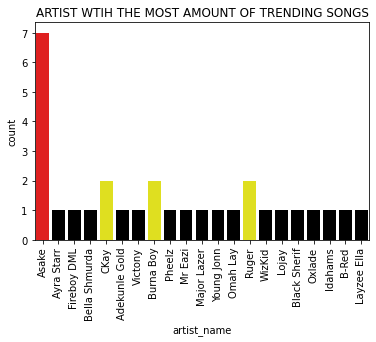

In [87]:
color=('red','black','black','black','yellow','black','black','yellow','black','black','black','black','black','yellow','black','black','black','black','black','black','black',)
sb.countplot(data = df, x=df.artist_name, palette=color)
plt.xticks(rotation = 90)
plt.title('ARTIST WTIH THE MOST AMOUNT OF TRENDING SONGS')